<a href="https://colab.research.google.com/github/jeki15/classification-survived-prediction/blob/main/train_titanic_survived_prediction_latihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/titanic train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
df.Age= df.Age.fillna(df.Age.mean())

In [ ]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Menentukan kolom berdasarkan Categoric dan Numeric
kolom_categoric = [column for column, is_type in (df.dtypes=="object").items() if is_type]
kolom_numeric = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]

In [ ]:
# Label Encoding Kolom Embarked
Embarked = {'S': 1, 'C': 2, 'Q': 0}
df['Embarked'] = df['Embarked'].map(Embarked)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,2


In [ ]:
# One Hot Encoding Kolom Sex
df = pd.concat([df, pd.get_dummies(df.Sex, prefix='Sex')], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,2,0,1


In [ ]:
# Label Encoding Kolom Cabin, Data tidak bisa diurutkan tapi karena jenis datanya terlalu banyak dan tidak mungkin kita pakai One Hot Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Cabin'] = labelencoder.fit_transform(df['Cabin'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,47,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,81,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,47,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,55,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,47,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,47,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,30,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,47,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,60,2,0,1


In [ ]:
# Cara Untuk Ngedrop Columns
df.drop(columns=['PassengerId', 'Name', 'Sex', 'Ticket'], inplace = True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22.000000,1,0,7.2500,47,1,0,1
1,1,1,38.000000,1,0,71.2833,81,2,1,0
2,1,3,26.000000,0,0,7.9250,47,1,1,0
3,1,1,35.000000,1,0,53.1000,55,1,1,0
4,0,3,35.000000,0,0,8.0500,47,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,47,1,0,1
887,1,1,19.000000,0,0,30.0000,30,1,1,0
888,0,3,29.699118,1,2,23.4500,47,1,1,0
889,1,1,26.000000,0,0,30.0000,60,2,0,1


In [ ]:
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

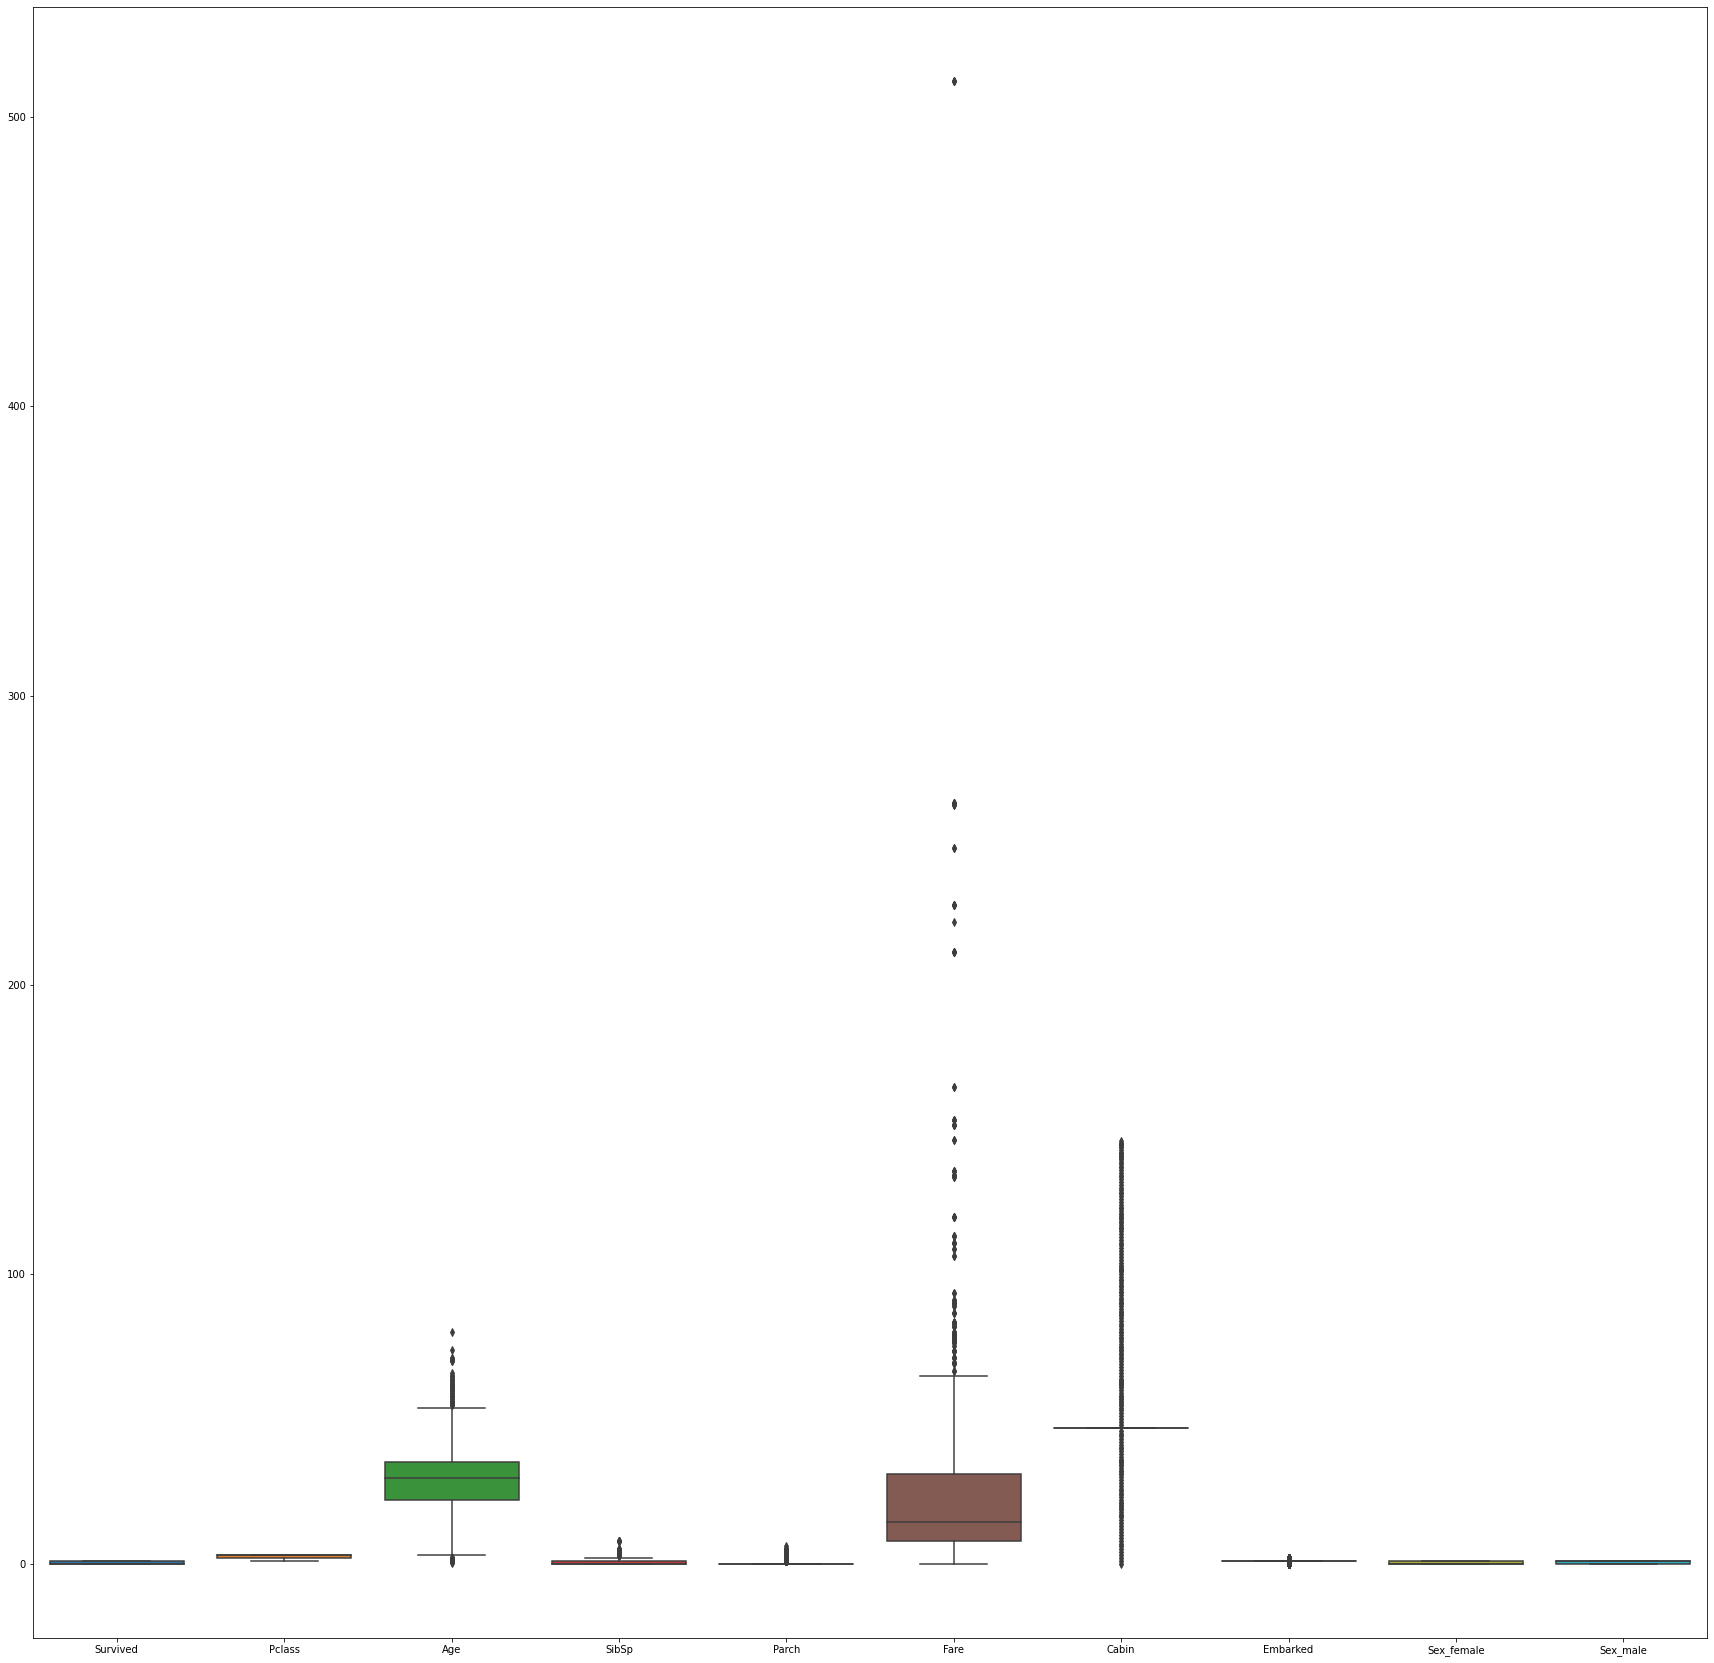

In [ ]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df)

In [ ]:
# Z-Score
columns = ['Age', 'SibSp', 'Parch', 'Fare']

for i in columns:
    upper_limit = df[i].mean() + 3*df[i].std()
    lower_limit = df[i].mean() - 3*df[i].std()

    df[i] = np.where(
        df[i]>upper_limit,
        upper_limit,
        np.where(
            df[i]<lower_limit,
            lower_limit,
            df[i]
        )
    )

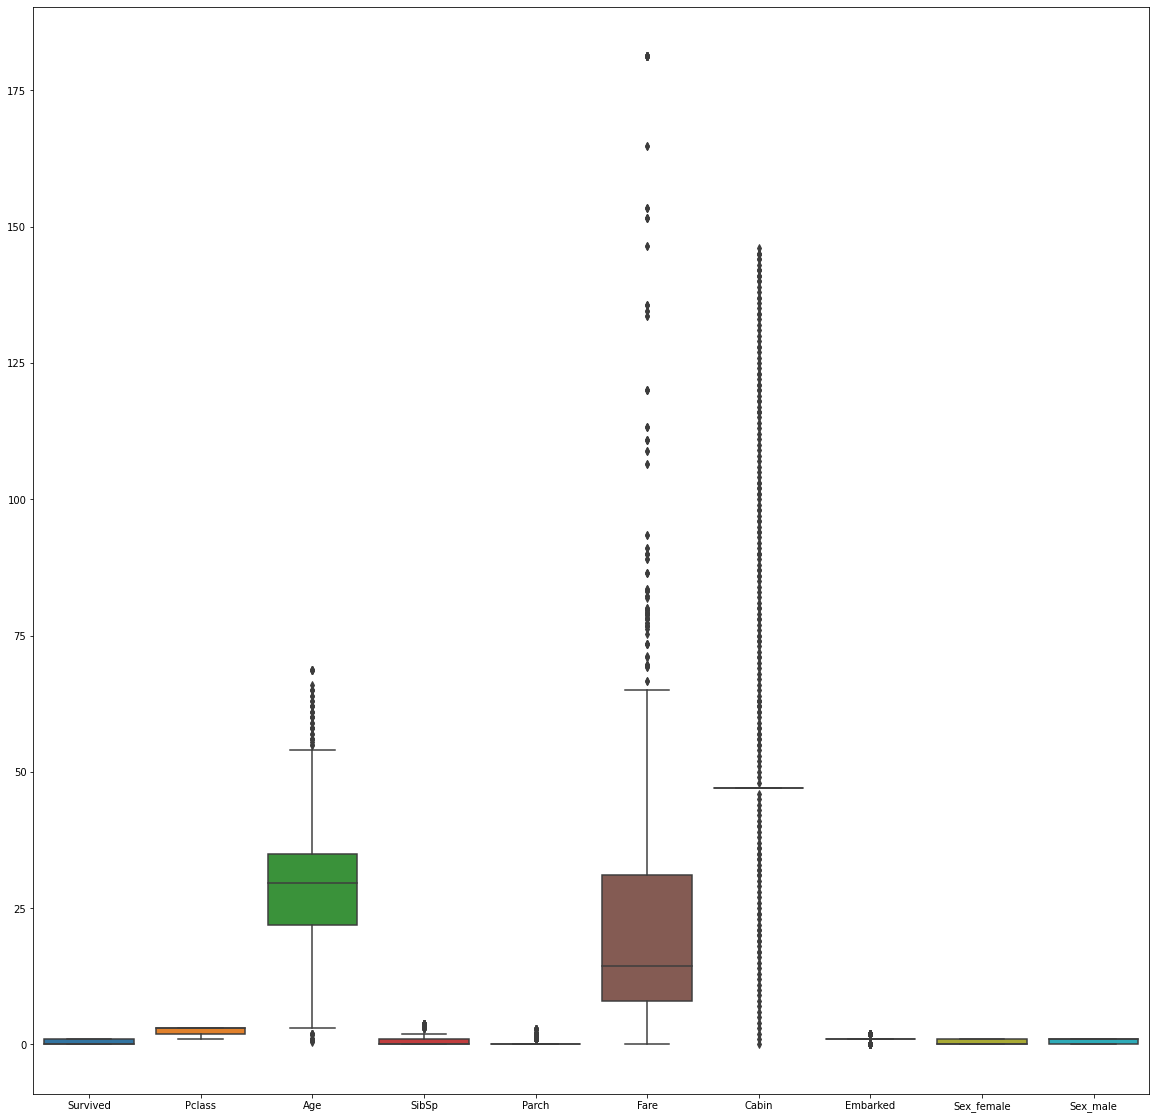

In [ ]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


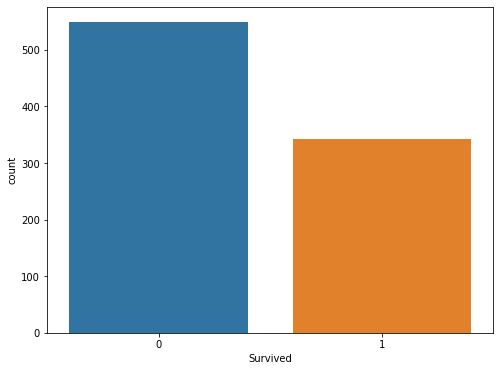

In [ ]:
# Imbalance Data

# Observe imbalance data here
plt.figure(figsize=(8,6))
sns.countplot(df.Survived)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


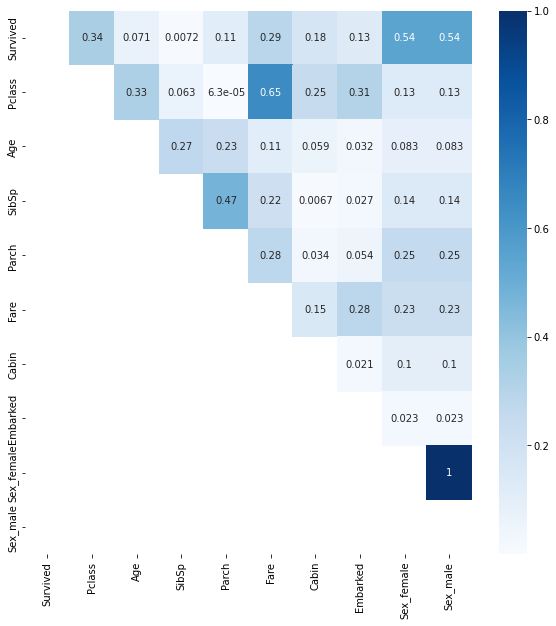

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

In [ ]:
# Memisahkan mana X dan mana y
y= df['Survived']
X= df.drop(['Survived'],1)
X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,3,22.0,1.0,0.0,7.2500,47,1,0,1
1,1,38.0,1.0,0.0,71.2833,81,2,1,0
2,3,26.0,0.0,0.0,7.9250,47,1,1,0
3,1,35.0,1.0,0.0,53.1000,55,1,1,0
4,3,35.0,0.0,0.0,8.0500,47,1,0,1


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y):

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")

        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))

        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")

        nfold += 1

    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [0.9859550561797753], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.8268156424581006], 1 of KFold 5
DecisionTreeClassifier Recall: [0.782608695652174], 1 of KFold 5
DecisionTreeClassifier Precission: [0.7714285714285715], 1 of KFold 5
DecisionTreeClassifier AUC: [0.8185770750988142], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [0.9859550561797753], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.8268156424581006], 2 of KFold 5
DecisionTreeClassifier Recall: [0.782608695652174], 2 of KFold 5
DecisionTreeClassifier Precission: [0.7714285714285715], 2 of KFold 5
Decis

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


----------AFTER------------
LogisticRegression Acc Train: [0.797752808988764, 0.8008415147265077], 2 of KFold 5
LogisticRegression Acc Test: [0.8100558659217877, 0.8033707865168539], 2 of KFold 5
LogisticRegression Recall: [0.7391304347826086, 0.7058823529411765], 2 of KFold 5
LogisticRegression Precission: [0.7611940298507462, 0.7619047619047619], 2 of KFold 5
LogisticRegression AUC: [0.7968379446640316, 0.7847593582887701], 2 of KFold 5
---------------------------
----------BEFORE------------
LogisticRegression Acc Train: [0.797752808988764, 0.8008415147265077], 3 of KFold 5
LogisticRegression Acc Test: [0.8100558659217877, 0.8033707865168539], 3 of KFold 5
LogisticRegression Recall: [0.7391304347826086, 0.7058823529411765], 3 of KFold 5
LogisticRegression Precission: [0.7611940298507462, 0.7619047619047619], 3 of KFold 5
LogisticRegression AUC: [0.7968379446640316, 0.7847593582887701], 3 of KFold 5
---------------------------
----------AFTER------------
LogisticRegression Acc Train:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


----------AFTER------------
KNeighborsClassifier Acc Train: [0.8103932584269663], 1 of KFold 5
KNeighborsClassifier Acc Test: [0.7486033519553073], 1 of KFold 5
KNeighborsClassifier Recall: [0.5652173913043478], 1 of KFold 5
KNeighborsClassifier Precission: [0.7222222222222222], 1 of KFold 5
KNeighborsClassifier AUC: [0.7144268774703557], 1 of KFold 5
---------------------------
----------BEFORE------------
KNeighborsClassifier Acc Train: [0.8103932584269663], 2 of KFold 5
KNeighborsClassifier Acc Test: [0.7486033519553073], 2 of KFold 5
KNeighborsClassifier Recall: [0.5652173913043478], 2 of KFold 5
KNeighborsClassifier Precission: [0.7222222222222222], 2 of KFold 5
KNeighborsClassifier AUC: [0.7144268774703557], 2 of KFold 5
---------------------------
----------AFTER------------
KNeighborsClassifier Acc Train: [0.8103932584269663, 0.814866760168303], 2 of KFold 5
KNeighborsClassifier Acc Test: [0.7486033519553073, 0.7471910112359551], 2 of KFold 5
KNeighborsClassifier Recall: [0.565

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


----------AFTER------------
LinearSVC Acc Train: [0.6980337078651685, 0.7784011220196353, 0.7769985974754559], 3 of KFold 5
LinearSVC Acc Test: [0.664804469273743, 0.7528089887640449, 0.7696629213483146], 3 of KFold 5
LinearSVC Recall: [0.21739130434782608, 0.5588235294117647, 0.6176470588235294], 3 of KFold 5
LinearSVC Precission: [0.7142857142857143, 0.7307692307692307, 0.7368421052631579], 3 of KFold 5
LinearSVC AUC: [0.5814229249011857, 0.7157754010695188, 0.7406417112299466], 3 of KFold 5
---------------------------
----------BEFORE------------
LinearSVC Acc Train: [0.6980337078651685, 0.7784011220196353, 0.7769985974754559], 4 of KFold 5
LinearSVC Acc Test: [0.664804469273743, 0.7528089887640449, 0.7696629213483146], 4 of KFold 5
LinearSVC Recall: [0.21739130434782608, 0.5588235294117647, 0.6176470588235294], 4 of KFold 5
LinearSVC Precission: [0.7142857142857143, 0.7307692307692307, 0.7368421052631579], 4 of KFold 5
LinearSVC AUC: [0.5814229249011857, 0.7157754010695188, 0.74064

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------AFTER------------
RandomForestClassifier Acc Train: [0.9859550561797753], 1 of KFold 5
RandomForestClassifier Acc Test: [0.8603351955307262], 1 of KFold 5
RandomForestClassifier Recall: [0.782608695652174], 1 of KFold 5
RandomForestClassifier Precission: [0.84375], 1 of KFold 5
RandomForestClassifier AUC: [0.8458498023715415], 1 of KFold 5
---------------------------
----------BEFORE------------
RandomForestClassifier Acc Train: [0.9859550561797753], 2 of KFold 5
RandomForestClassifier Acc Test: [0.8603351955307262], 2 of KFold 5
RandomForestClassifier Recall: [0.782608695652174], 2 of KFold 5
RandomForestClassifier Precission: [0.84375], 2 of KFold 5
RandomForestClassifier AUC: [0.8458498023715415], 2 of KFold 5
---------------------------
----------AFTER------------
RandomForestClassifier Acc Train: [0.9859550561797753, 0.9915848527349228], 2 of KFold 5
RandomForestClassifier Acc Test: [0.8603351955307262, 0.8089887640449438], 2 of KFold 5
RandomForestClassifier Recall: [0.

In [ ]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
7,GradientBoostingClassifier,0.910773,0.839476,0.836535,0.725149,0.817971,0.071296
9,XGBClassifier,0.885520,0.830494,0.829732,0.704731,0.806853,0.055026
6,RandomForestClassifier,0.987934,0.821505,0.790724,0.730818,0.804442,0.166429
8,ExtraTreesClassifier,0.987934,0.802467,0.754641,0.719224,0.786776,0.185467
1,LogisticRegression,0.804992,0.800213,0.756511,0.707204,0.782568,0.004779
0,DecisionTreeClassifier,0.987934,0.793453,0.725944,0.745567,0.784452,0.194481
3,GaussianNB,0.789001,0.790132,0.710510,0.762873,0.784914,0.001131
2,KNeighborsClassifier,0.813972,0.723878,0.665208,0.573103,0.695517,0.090094
5,LinearSVC,0.718288,0.697006,0.548379,0.443478,0.649921,0.021283
4,SVC,0.700053,0.692449,0.684012,0.368244,0.631303,0.007605


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [ ]:
#Grid Search


model = LogisticRegression()

param = dict()
param['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
param['C'] = [0.00001, 0.0001, 0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20, 100]

cv = RepeatedStratifiedKFold(n_splits=5, random_state=42)
clf1 = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clf1.fit(X,y)

Fitting 50 folds for each of 240 candidates, totalling 12000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.003, 0.005, 0.01, 0.03,
                               0.05, 0.1, 0.3, 0.5, 1, 2, 3, 3, 4, 5, 10, 20,
                               100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=4)

In [ ]:
# print('Best Score: {}'.format(clf1.best_score_))
# print('Best Hyperparameters: {}'.format(clf1.best_params_))

Best Score: 0.794651936476053
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
print('Best Score: {}'.format(clf1.best_score_))
print('Best Hyperparameters: {}'.format(clf1.best_params_))

Best Score: 0.7976580252338209
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [ ]:
#Pisahin X, y jadi X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (712, 9)
y_train dataset shape:  (712,)
X_test dataset shape:  (179, 9)
y_test dataset shape:  (179,)


In [ ]:
# Buat Model Pakai Best Param Dari GridSearchCV
modeltun = LogisticRegression(**clf1.best_params_)

In [ ]:
# Melatih Model Pakai data train kita
model_fit = modeltun.fit(X_train,y_train)


In [ ]:
# # Cek Peforma model kita di data latih
# y_pred_train=model_fit.predict(X_train)
# print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       444
           1       0.77      0.68      0.72       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



In [ ]:
# Cek Peforma model kita di data latih
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       444
           1       0.76      0.68      0.72       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



In [ ]:
# # Cek Peforma model kita di data test
# y_pred_test=model_fit.predict(X_test)
# print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
# Cek Peforma model kita di data test
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

